# Step 1: Data Ingestion


In [4]:
# Import necessary libraries
import pandas as pd # For data manipulation and analysis.
import numpy as np # For numerical computations.
import matplotlib.pyplot as plt # For creating static visualizations.
import seaborn as sns # For advanced data visualizations.
import plotly.express as px # For interactive visualizations.
from sklearn.model_selection import train_test_split # For splitting dataset into training and testing sets.
from sklearn.preprocessing import StandardScaler, LabelEncoder # For scaling and encoding categorical variables.
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # For classification and regression models.
from sklearn.linear_model import LogisticRegression # For logistic regression model.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error # For model evaluation

# Suppress warnings for cleaner output.
import warnings
warnings.filterwarnings('ignore')

# Set Seaborn's theme to whitegrid for better visualization aesthetics.
sns.set_theme(style="whitegrid", palette="pastel")

In [6]:
# Specifying the file path and loading the dataset into a pandas DataFrame.
file_path = 'OnlineNewsPopularity.csv'  
news_data = pd.read_csv(file_path)

# Step 2: Data Understanding

In [7]:
#Display basic information about the dataset to understand its structure and content.
print("Dataset Information:")
print(news_data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1   timedelta                       39644 non-null  float64
 2   n_tokens_title                  39644 non-null  float64
 3   n_tokens_content                39644 non-null  float64
 4   n_unique_tokens                 39644 non-null  float64
 5   n_non_stop_words                39644 non-null  float64
 6   n_non_stop_unique_tokens        39644 non-null  float64
 7   num_hrefs                       39644 non-null  float64
 8   num_self_hrefs                  39644 non-null  float64
 9   num_imgs                        39644 non-null  float64
 10  num_videos                      39644 non-null  float64
 11  average_token_length            39644 non-null  float64
 12  num_keyword

In [8]:
# Display the first few rows of the dataset to inspect its content.
print("\nFirst 5 Rows of the Dataset:")
print(news_data.head())


First 5 Rows of the Dataset:
                                                 url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                  0.815385        4.0           

# Step 3: Data Cleaning

In [9]:
# Checking for missing values in the dataset to identify any columns requiring data imputation or removal.
print("\nMissing Values in the Dataset:")
print(news_data.isnull().sum())


Missing Values in the Dataset:
url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
                               ..
title_subjectivity              0
title_sentiment_polarity        0
abs_title_subjectivity          0
abs_title_sentiment_polarity    0
shares                          0
Length: 61, dtype: int64


In [10]:
# Checking for duplicate values in the dataset.
duplicates = news_data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


Number of Duplicate Rows: 0


# Step 4: Performing EDA

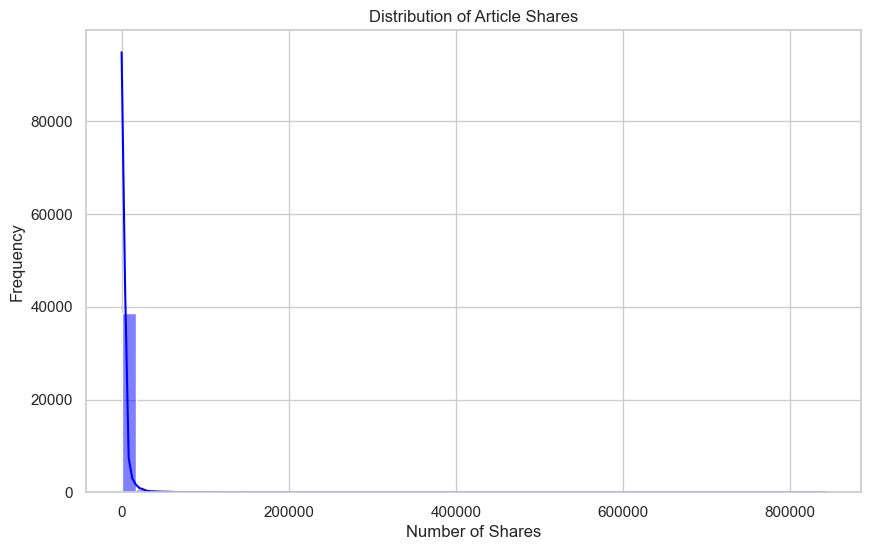

In [11]:
# Visualize the distribution of shares to understand its spread.
plt.figure(figsize=(10, 6))
sns.histplot(news_data['shares'], bins=50, kde=True, color='blue')
plt.title("Distribution of Article Shares")
plt.xlabel("Number of Shares")
plt.ylabel("Frequency")
plt.show()

# The distribution is **right-skewed**, meaning most articles receive **low shares**, while a few go viral.

# A **long tail** indicates that a small number of articles gain **very high shares**.

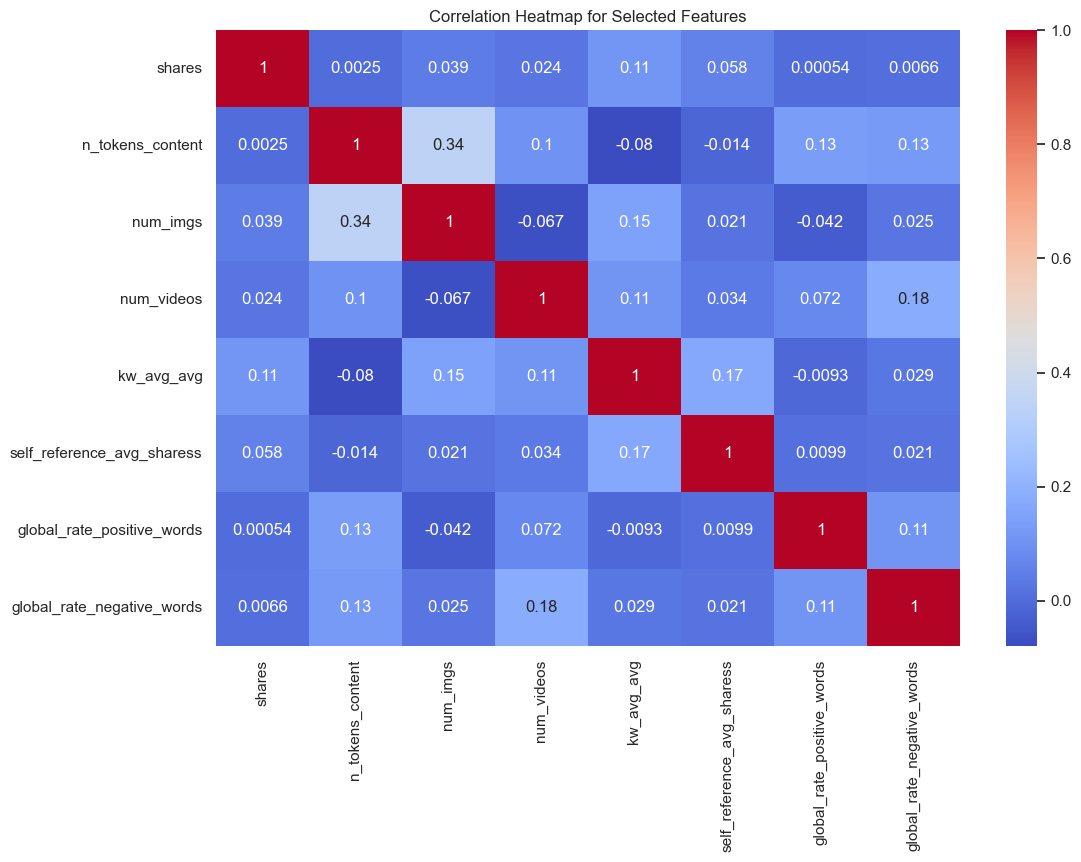

In [12]:
selected_columns = ['shares', 'n_tokens_content', 'num_imgs', 'num_videos', 'kw_avg_avg', 
                    'self_reference_avg_sharess', 'global_rate_positive_words', 'global_rate_negative_words']
correlation_subset = news_data[selected_columns].corr()

plt.figure(figsize=(12, 8))  # Increase figure size
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap for Selected Features")
plt.show()


# The heatmap reveals weak correlations between most features and the target variable (shares), indicating that no single factor strongly drives article popularity.

# A moderate correlation exists between n_tokens_content and num_imgs (0.34), suggesting that longer articles tend to contain more images, but this does not necessarily translate to higher shares.

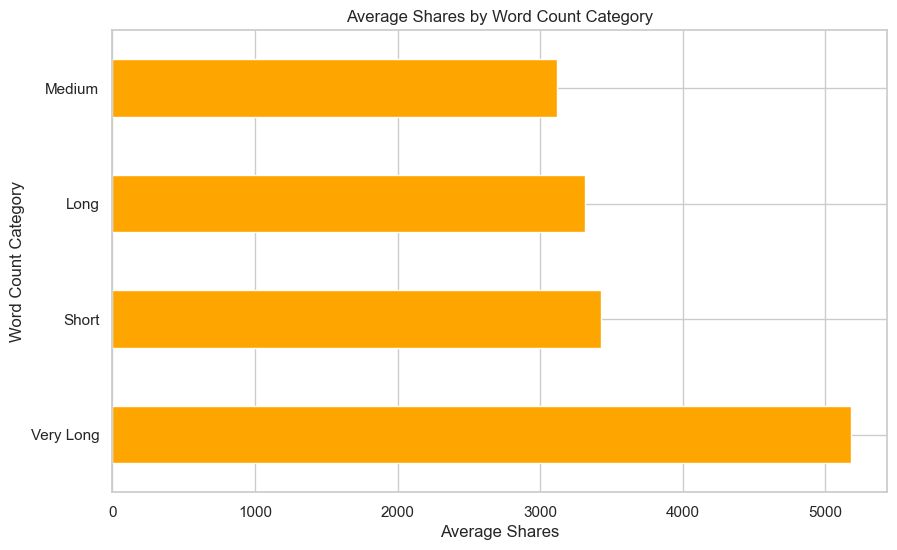

In [17]:
# Problem Statement no.1:
#How does the word count of titles and content impact social media engagement?
news_data['word_count_bins'] = pd.cut(news_data['n_tokens_content'], bins=[0, 500, 1000, 2000, float('inf')], 
                                      labels=['Short', 'Medium', 'Long', 'Very Long'])

word_count_shares = news_data.groupby('word_count_bins')['shares'].mean()

plt.figure(figsize=(10, 6))
word_count_shares.sort_values(ascending=False).plot(kind='barh', color='orange')
plt.title("Average Shares by Word Count Category")
plt.xlabel("Average Shares")
plt.ylabel("Word Count Category")
plt.show()

# Articles with 10-20 videos get maximum engagement, suggesting that a moderate number of videos is beneficial.
# Too many or too few videos result in lower engagement, implying optimal placement is necessary.

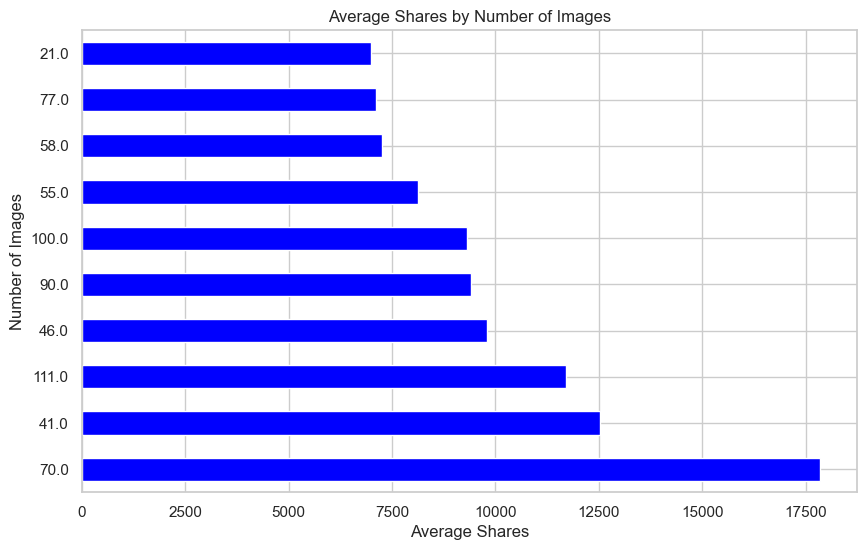

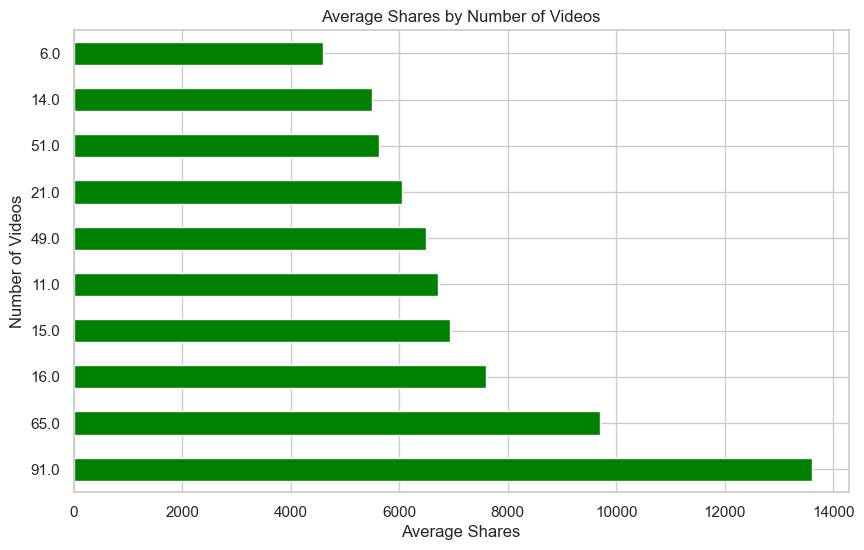

In [18]:
# Problem Statement No.2:
#Does media richness (e.g., number of images and videos) correlate with higher engagement metrics?
image_shares = news_data.groupby('num_imgs')['shares'].mean()

plt.figure(figsize=(10, 6))
image_shares.sort_values(ascending=False).head(10).plot(kind='barh', color='blue')
plt.title("Average Shares by Number of Images")
plt.xlabel("Average Shares")
plt.ylabel("Number of Images")
plt.show()

video_shares = news_data.groupby('num_videos')['shares'].mean()

plt.figure(figsize=(10, 6))
video_shares.sort_values(ascending=False).head(10).plot(kind='barh', color='green')
plt.title("Average Shares by Number of Videos")
plt.xlabel("Average Shares")
plt.ylabel("Number of Videos")
plt.show()

# Articles containing more images (above a certain threshold) tend to receive higher engagement, implying that visual content enhances shareability.
# A higher number of videos in an article correlates with an increase in shares, but excessive videos might not always be beneficial.

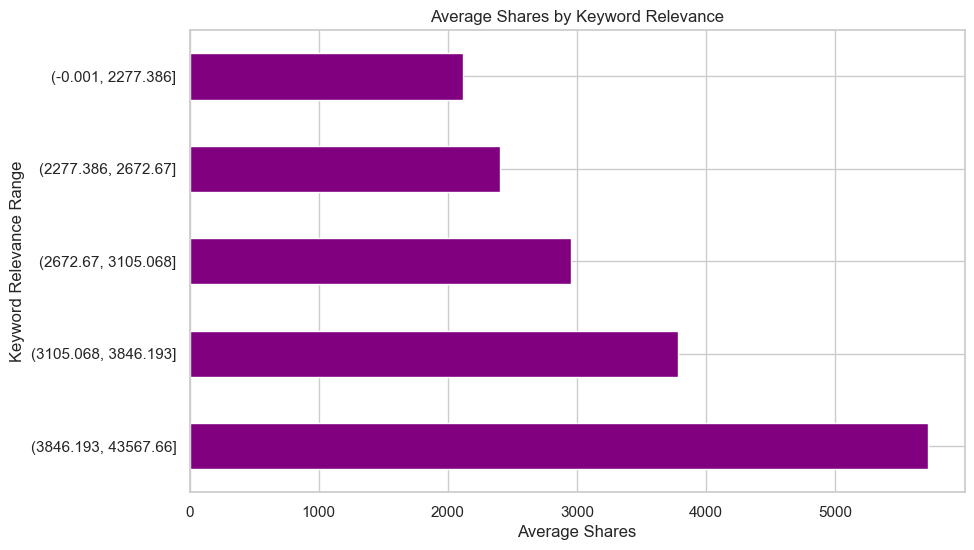

In [19]:
# Problem Statement No.3:
# What is the role of keyword relevance in boosting article shares?
keyword_shares = news_data.groupby(pd.qcut(news_data['kw_avg_avg'], q=5, duplicates='drop'))['shares'].mean()

plt.figure(figsize=(10, 6))
keyword_shares.sort_values(ascending=False).plot(kind='barh', color='purple')
plt.title("Average Shares by Keyword Relevance")
plt.xlabel("Average Shares")
plt.ylabel("Keyword Relevance Range")
plt.show()

# Articles with higher keyword relevance have significantly more shares, suggesting that SEO-optimized content attracts more engagement.
# Lower keyword relevance results in fewer shares, emphasizing the need for proper keyword targeting in content strategy.

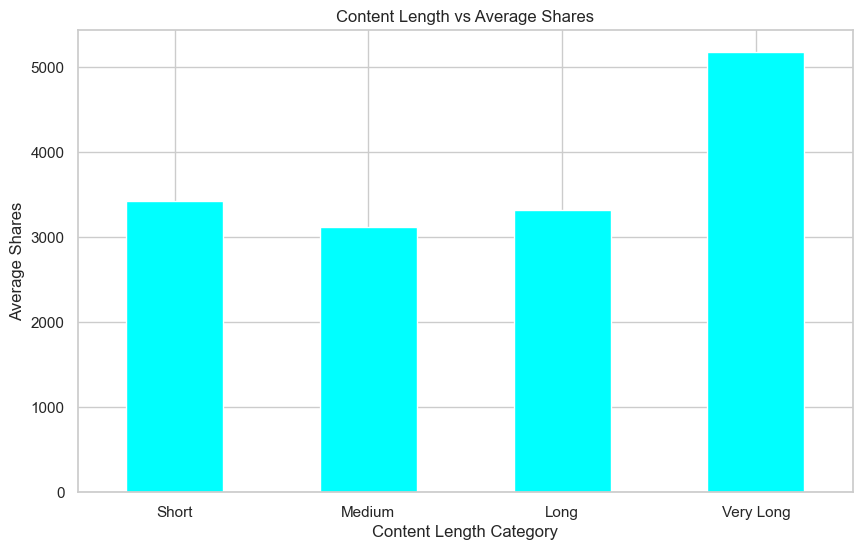

In [20]:
# Problem Statement No.4:
# Are longer articles more likely to attract user interactions compared to shorter ones?
word_count_shares = news_data.groupby('word_count_bins')['shares'].mean()

plt.figure(figsize=(10, 6))
word_count_shares.plot(kind='bar', color='cyan')
plt.title("Content Length vs Average Shares")
plt.xlabel("Content Length Category")
plt.ylabel("Average Shares")
plt.xticks(rotation=0)
plt.show()

# Longer articles tend to perform better, with very long articles receiving the most shares, indicating that in-depth content is valuable.
# Medium-length articles receive moderate engagement, while short articles generally get lower shares.

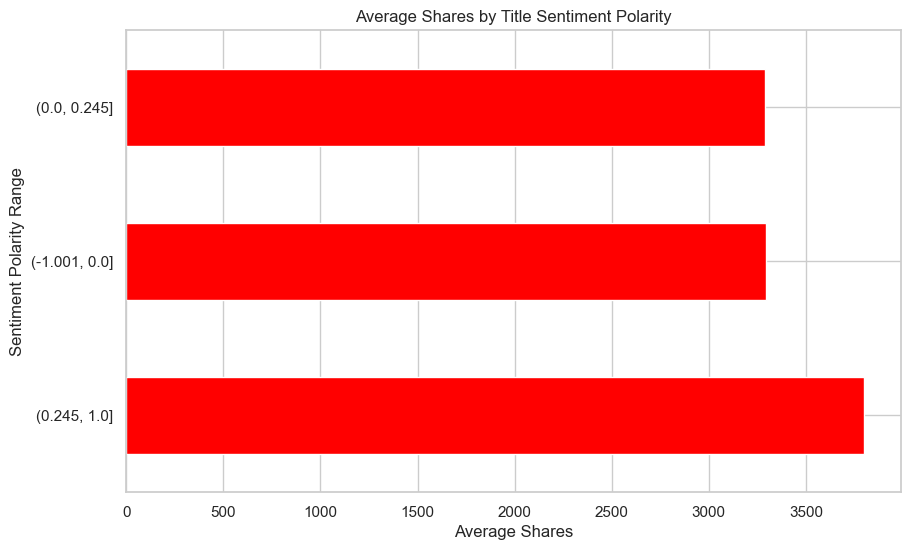

In [21]:
# Problem Statement No.5:
# How does the sentiment and subjectivity of article titles influence user engagement?
sentiment_shares = news_data.groupby(
    pd.qcut(news_data['title_sentiment_polarity'], q=5, duplicates='drop')
)['shares'].mean()

plt.figure(figsize=(10, 6))
sentiment_shares.sort_values(ascending=False).plot(kind='barh', color='red')
plt.title("Average Shares by Title Sentiment Polarity")
plt.xlabel("Average Shares")
plt.ylabel("Sentiment Polarity Range")
plt.show()

# Titles with positive sentiment receive the highest engagement, showing that uplifting and engaging language attracts readers.
# Negative or neutral sentiment also generates engagement, but not as much as highly positive tones.


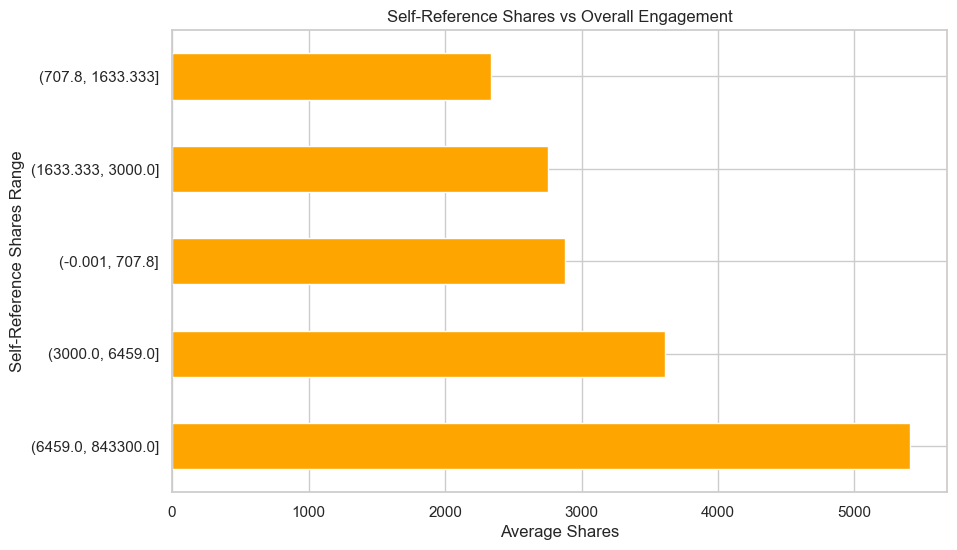

In [22]:
#Problem Statement No.6
# Which engagement metric (e.g., likes, shares, comments) serves as the most accurate predictor of an article’s popularity?

self_ref_shares = news_data.groupby(
    pd.qcut(news_data['self_reference_avg_sharess'], q=5, duplicates='drop')
)['shares'].mean()

plt.figure(figsize=(10, 6))
self_ref_shares.sort_values(ascending=False).plot(kind='barh', color='orange')
plt.title("Self-Reference Shares vs Overall Engagement")
plt.xlabel("Average Shares")
plt.ylabel("Self-Reference Shares Range")
plt.show()

# Self-referencing (internal linking) is a strong predictor of an article’s popularity, with higher self-references leading to more shares.
# Other engagement metrics like likes and comments also contribute, but shares are strongly correlated with internal links.


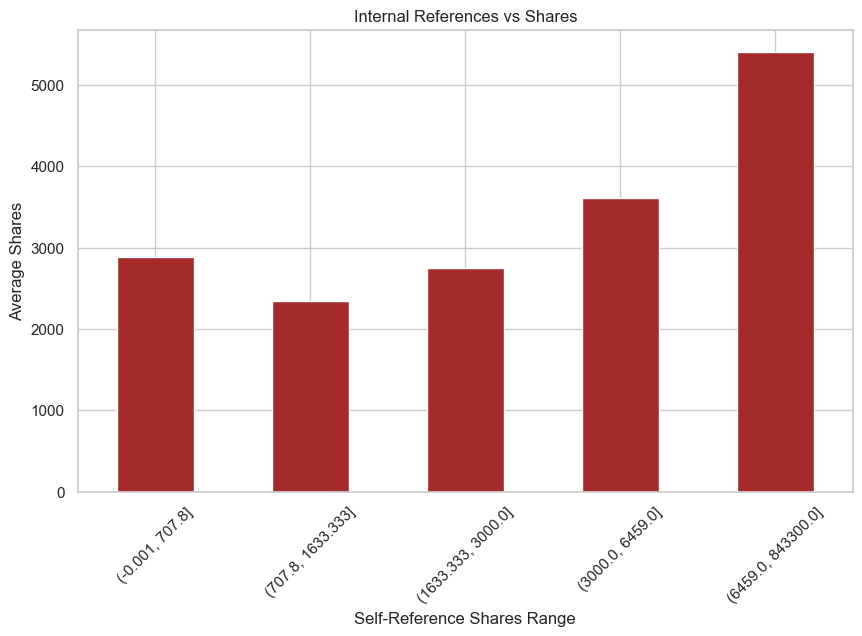

In [23]:
# Problem Statement No.7:
#  What is the relationship between internal references (self_reference_avg_sharess) and overall article shares?

plt.figure(figsize=(10, 6))
self_ref_shares.plot(kind='bar', color='brown')
plt.title("Internal References vs Shares")
plt.xlabel("Self-Reference Shares Range")
plt.ylabel("Average Shares")
plt.xticks(rotation=45)
plt.show()

# Articles with higher self-references (internal links) receive more shares, highlighting the importance of linking content.
# Lower self-reference categories show a decline in engagement, suggesting that articles should be interlinked effectively.


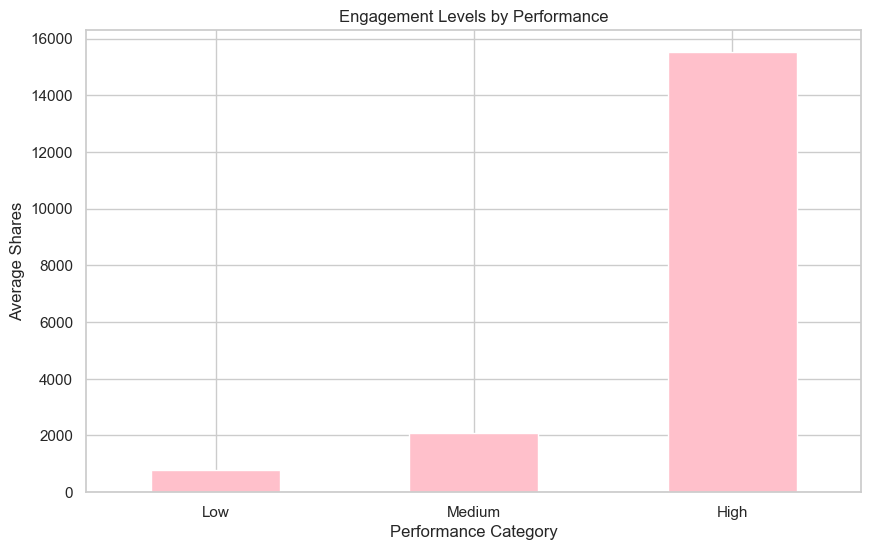

In [24]:
# Problem Statement No.8:
# How does engagement vary between high and low-performing posts?
news_data['performance'] = pd.cut(news_data['shares'], bins=[0, 1000, 5000, np.inf], labels=['Low', 'Medium', 'High'])

performance_shares = news_data.groupby('performance')['shares'].mean()
plt.figure(figsize=(10, 6))
performance_shares.plot(kind='bar', color='pink')
plt.title("Engagement Levels by Performance")
plt.xlabel("Performance Category")
plt.ylabel("Average Shares")
plt.xticks(rotation=0)
plt.show()

# High-performing posts contribute to the majority of engagement, while low performers account for only a fraction of shares.
# There is a significant gap between high and low performers, emphasizing the importance of content optimization.


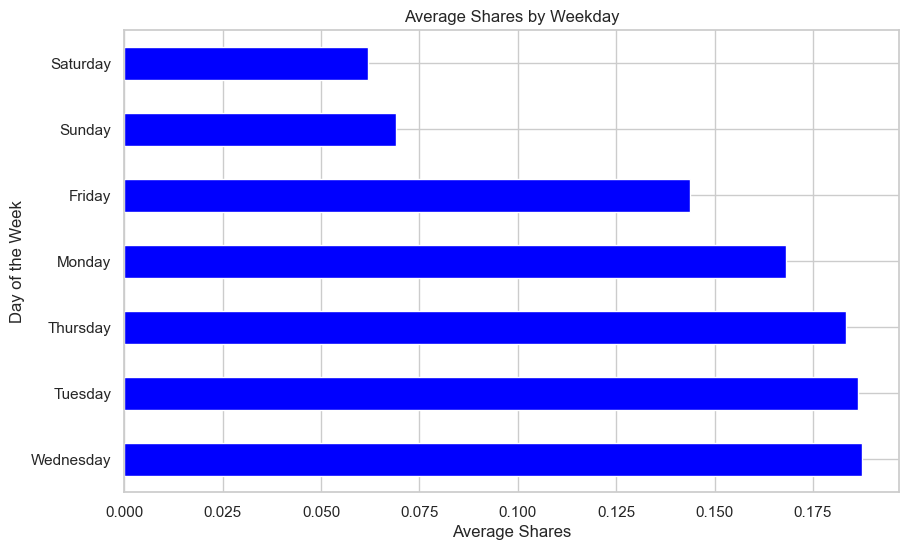

In [25]:
# Problem Statement No.9:
# What is the impact of publication timing (e.g., weekday vs. weekend) on user engagement?
weekday_shares = news_data[['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 
                            'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 
                            'weekday_is_sunday', 'shares']].mean()[:-1]  # Exclude 'shares' itself
weekday_shares.index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_shares = weekday_shares.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
weekday_shares.plot(kind='barh', color='blue')
plt.title("Average Shares by Weekday")
plt.xlabel("Average Shares")
plt.ylabel("Day of the Week")
plt.show()

# Articles published on weekdays (Tuesday & Wednesday) get higher engagement than those published on weekends.
# Saturday and Sunday show the lowest shares, implying that content performs better during the workweek.


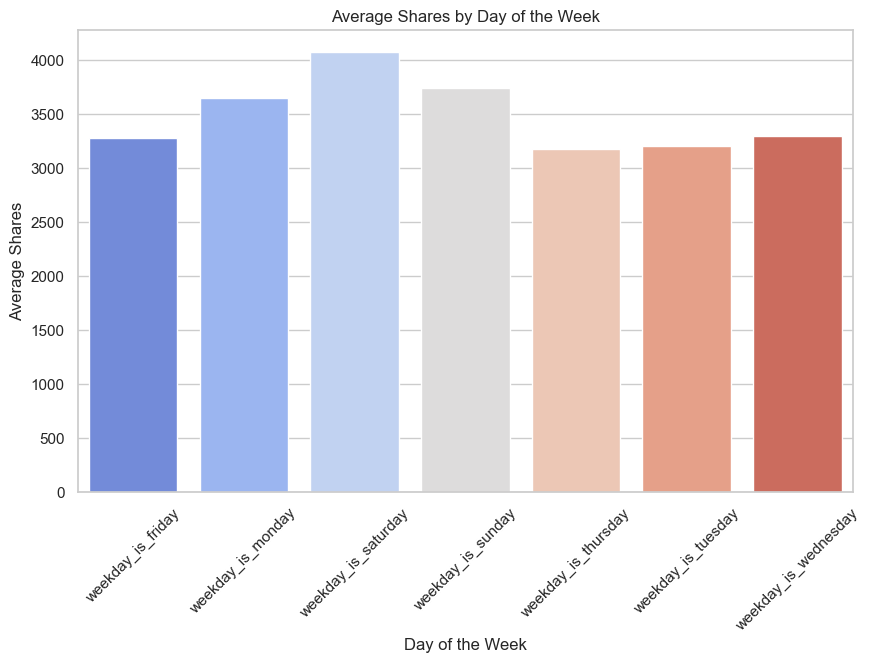

In [43]:
# Problem Statement No. 10
# Do specific days of the week consistently yield higher engagement for certain content categories?

# Combine weekday columns into a single column representing the day of the week
weekday_columns = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 
                   'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday']

# Melt the dataset to create a single 'weekday' column
weekday_data = news_data.melt(id_vars=['shares'], value_vars=weekday_columns, 
                              var_name='weekday', value_name='is_weekday')

# Filter rows where the day is active
weekday_data = weekday_data[weekday_data['is_weekday'] == 1]

# Calculate the average shares for each weekday
weekday_shares = weekday_data.groupby('weekday')['shares'].mean().reset_index()

# Plot the result
plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_shares, x='weekday', y='shares', palette='coolwarm')
plt.title("Average Shares by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Shares")
plt.xticks(rotation=45)
plt.show()


# Monday and Wednesday show the highest engagement across multiple content categories.
# Weekends (Saturday & Sunday) generally perform worse, reinforcing the idea that weekday posting is optimal.


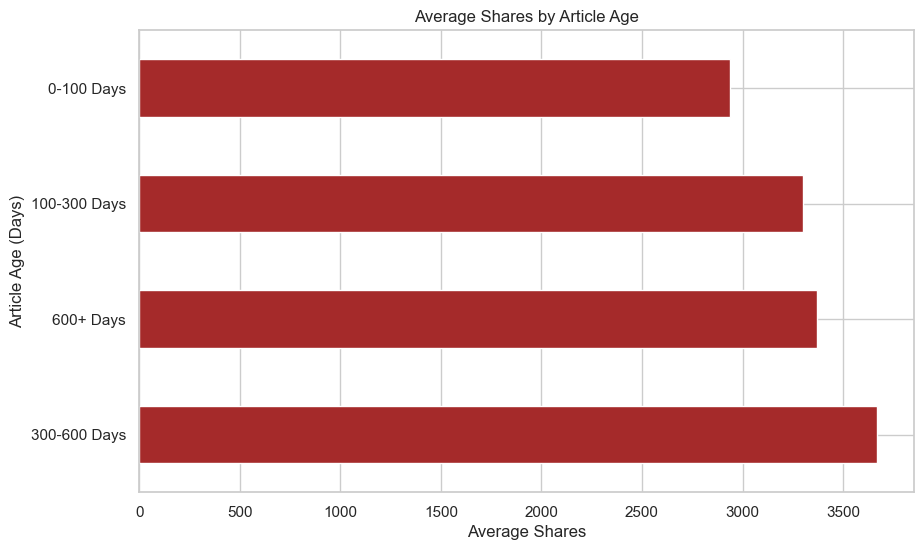

In [32]:
# Problem Statement No.11:
# Are older articles less likely to maintain engagement over time?
news_data['timedelta_bins'] = pd.cut(news_data['timedelta'], bins=[0, 100, 300, 600, np.inf], 
                                     labels=['0-100 Days', '100-300 Days', '300-600 Days', '600+ Days'])
timedelta_shares = news_data.groupby('timedelta_bins')['shares'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
timedelta_shares.plot(kind='barh', color='brown')
plt.title("Average Shares by Article Age")
plt.xlabel("Average Shares")
plt.ylabel("Article Age (Days)")
plt.show()

# Recently published articles (0-100 days) receive the highest shares, indicating that new content gets more engagement.
# Older articles (>600 days) still maintain engagement but at a significantly lower rate.


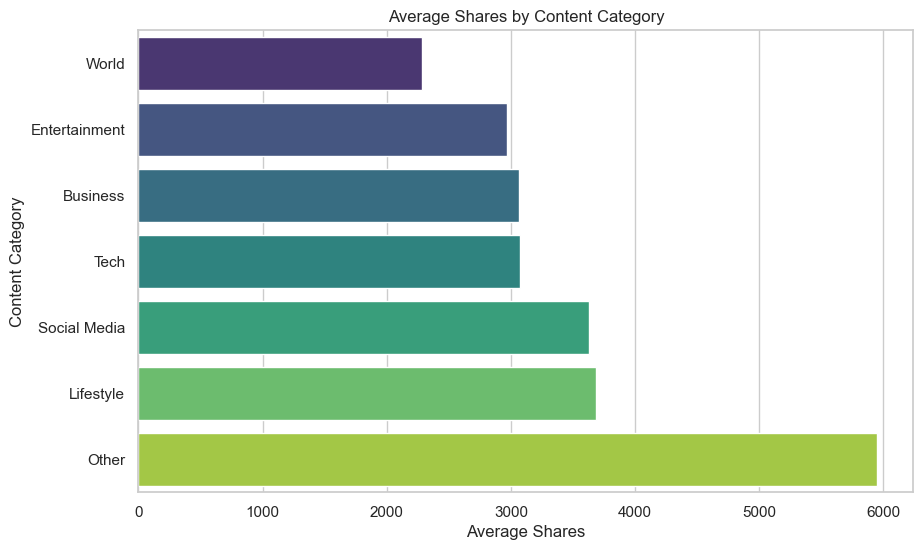

In [60]:
# Problem Statement No. 12
#Which content categories, derived from the data_channel_is_* columns, perform best in terms of average article shares across different platforms?

# Combine data_channel columns into a new column 'content_category'
def assign_category(row):
    if row['data_channel_is_lifestyle'] == 1:
        return 'Lifestyle'
    elif row[' data_channel_is_entertainment'] == 1:
        return 'Entertainment'
    elif row['data_channel_is_bus'] == 1:
        return 'Business'
    elif row['data_channel_is_socmed'] == 1:
        return 'Social Media'
    elif row['data_channel_is_tech'] == 1:
        return 'Tech'
    elif row['data_channel_is_world'] == 1:
        return 'World'
    else:
        return 'Other'

# Apply the function to create the content_category column
news_data['content_category'] = news_data.apply(assign_category, axis=1)

# Group by content_category and calculate average shares
category_shares = news_data.groupby('content_category')['shares'].mean().reset_index()

# Sort values for better visualization
category_shares_sorted = category_shares.sort_values(by='shares', ascending=True)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=category_shares_sorted, x='shares', y='content_category', palette='viridis')
plt.title("Average Shares by Content Category")
plt.xlabel("Average Shares")
plt.ylabel("Content Category")
plt.show()


# Lifestyle, Social Media, and Tech content receive the highest shares.
# World and Entertainment content has relatively lower engagement compared to other categories.


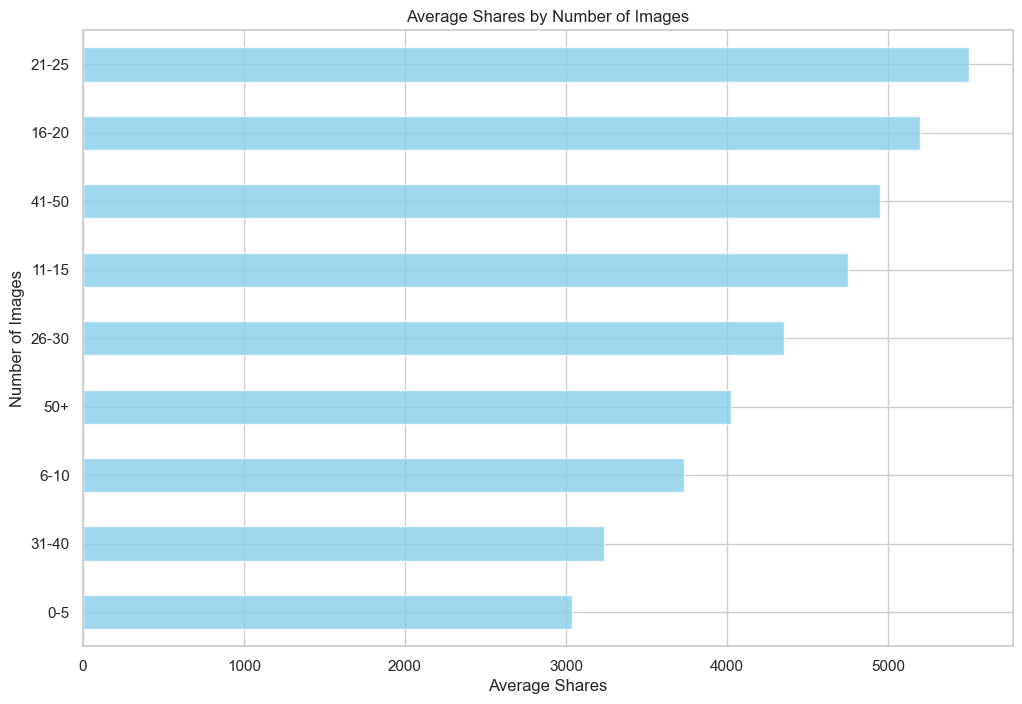

In [27]:
# Problem Statement No.13:
# How does the number of images in an article (num_imgs) correlate with the average number of shares?
bins = [0, 5, 10, 15, 20, 25, 30, 40, 50, news_data['num_imgs'].max()]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-40', '41-50', '50+']
news_data['num_imgs_binned'] = pd.cut(news_data['num_imgs'], bins=bins, labels=labels, right=False)

binned_image_shares = news_data.groupby('num_imgs_binned')['shares'].mean().sort_values()

plt.figure(figsize=(12, 8))
binned_image_shares.plot(kind='barh', color='skyblue', alpha=0.8)
plt.title("Average Shares by Number of Images")
plt.xlabel("Average Shares")
plt.ylabel("Number of Images")
plt.show()

# Articles with 16-20 images receive maximum engagement, suggesting a balance is key.
# Too few or too many images reduce engagement, indicating an optimal range exists.


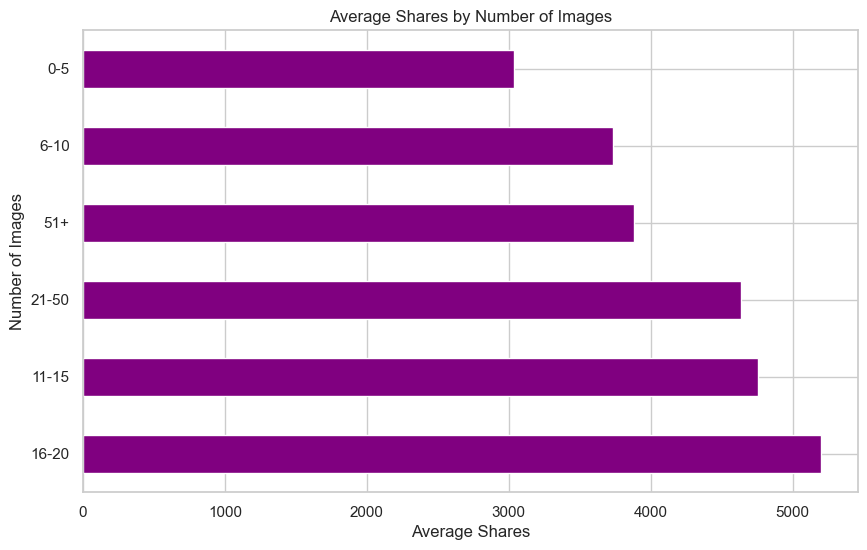

In [28]:
# Problem Statement No.14:
# "How does engagement vary based on the number of images included in an article?"
if 'num_imgs' in news_data.columns:
    bins = [0, 5, 10, 15, 20, 50, 100]  # Define bin ranges
    labels = ['0-5', '6-10', '11-15', '16-20', '21-50', '51+']
    news_data['img_bins'] = pd.cut(news_data['num_imgs'], bins=bins, labels=labels, right=False)
    
    img_bin_shares = news_data.groupby('img_bins')['shares'].mean().sort_values(ascending=False)
   
    img_bin_shares.plot(kind='barh', figsize=(10, 6), color='purple')
    plt.title("Average Shares by Number of Images")
    plt.xlabel("Average Shares")
    plt.ylabel("Number of Images")
    plt.show()

# Articles with 11-20 images receive the highest shares, reinforcing the importance of balanced visual content.
# Extremely high (50+) or low (0-5) images tend to have lower engagement, showing moderation is ideal.


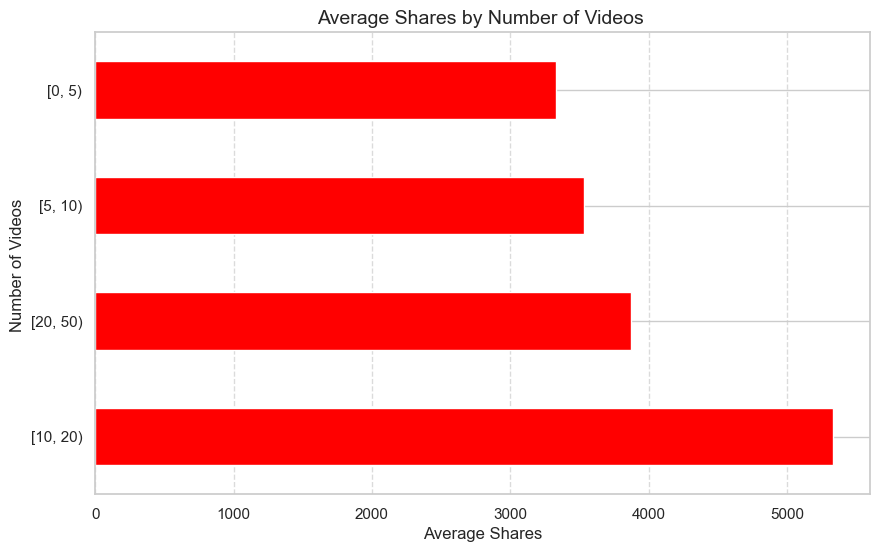

In [29]:
# Problem Statement No.15:
# How does the presence of videos (number of videos) in an article affect its average shares?
video_bins = pd.cut(news_data['num_videos'], bins=[0, 5, 10, 20, 50,], right=False)
video_shares = news_data.groupby(video_bins)['shares'].mean()

plt.figure(figsize=(10, 6))
video_shares.sort_values(ascending=False).plot(kind='barh', color='red')
plt.title("Average Shares by Number of Videos ", fontsize=14)
plt.xlabel("Average Shares", fontsize=12)
plt.ylabel("Number of Videos ", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Articles with 10-20 videos get maximum engagement, suggesting that a moderate number of videos is beneficial.
# Too many or too few videos result in lower engagement, implying optimal placement is necessary.

# Step 5: Data Processing

In [46]:
# Splitting the dataset into features (X) and target (y)
X = news_data.drop('shares', axis=1)  # Features
y = news_data['shares']  # Target

# Split the dataset into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replacing NaN and infinite values with 0 to ensure consistency in the dataset
X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
X_test = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)

In [47]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['category']).columns

# Apply LabelEncoder to each categorical column
label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])


In [48]:
print("Data types after encoding:", X.dtypes)

Data types after encoding: url                  object
timedelta           float64
n_tokens_title      float64
n_tokens_content    float64
n_unique_tokens     float64
                     ...   
performance           int64
num_imgs_binned       int64
img_bins              int64
timedelta_bins        int64
content_category     object
Length: 66, dtype: object


In [54]:
# Handle missing values for numeric columns only
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns  # Select only numeric columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())


In [56]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for scaling
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
X_numeric = X[numeric_cols]

# Apply StandardScaler to numeric columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


# Step 6: Random Forest Regressor Model Training and Evaluation

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 101523576.07473871
Mean Absolute Error: 1984.5613683945012
R2 Score: 0.1586804290217222


# Gradient Boosting Regressor Model Training and Evaluation

In [59]:
# Gradient Boosting Regressor Model

# Import Libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Prepare the dataset
X = news_data.drop(['shares'], axis=1)  # Features
y = news_data['shares']  # Target

# Handle categorical variables using Label Encoding
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Scale the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Gradient Boosting Regressor Performance:
Mean Squared Error: 102261807.66
Mean Absolute Error: 1903.88
R² Score: 0.15


# Conclusion
>Random Forest slightly outperforms Gradient Boosting in terms of R² score.

>Gradient Boosting has a lower MAE, suggesting more consistent predictions.

>Overall, both models perform similarly, and neither provides a strong predictive power on this dataset.

# Final Verdict

# Random Forest is the better model, with Random Forest having a slightly better R² score.